In [1]:
import pickle
import numpy as np
import csv

# Load the training data
with open('./data/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

# Access images and labels
train_images = train_data['images']
train_labels = train_data['labels']

# Load the test data
with open('./data/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

# Access test images
test_images = test_data['images']

# Flatten the training images
X_train = np.array([img.flatten() for img in train_images])
y_train = np.array(train_labels)

# Flatten the test images
X_test = np.array([img.flatten() for img in test_images])

# Normalize the data (optional but recommended)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Number of classes
num_classes = 4  # classes 0 to 3

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes):
    N = len(y)
    y_one_hot = np.zeros((N, num_classes))
    y_one_hot[np.arange(N), y] = 1
    return y_one_hot

y_train_one_hot = one_hot_encode(y_train, num_classes)

# Hyperparameters
learning_rate = 0.1
num_epochs = 50
batch_size = 64

# Initialize weights and bias
np.random.seed(42)  # For reproducibility
num_features = X_train.shape[1]  # Should be 28*28 = 784
W = np.random.randn(num_features, num_classes) * 0.01
b = np.zeros(num_classes)

# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Training loop
N = X_train.shape[0]
for epoch in range(num_epochs):
    # Shuffle the data at the beginning of each epoch
    indices = np.arange(N)
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_one_hot_shuffled = y_train_one_hot[indices]
    
    # Mini-batch gradient descent
    for i in range(0, N, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_one_hot_shuffled[i:i+batch_size]
        
        # Forward pass
        logits = np.dot(X_batch, W) + b  # Shape: (batch_size, num_classes)
        probs = softmax(logits)  # Shape: (batch_size, num_classes)
        
        # Backward pass (compute gradients)
        grad_logits = (probs - y_batch) / batch_size  # Shape: (batch_size, num_classes)
        grad_W = np.dot(X_batch.T, grad_logits)  # Shape: (num_features, num_classes)
        grad_b = np.sum(grad_logits, axis=0)  # Shape: (num_classes,)
        
        # Update weights
        W -= learning_rate * grad_W
        b -= learning_rate * grad_b

    # Optional: Compute training accuracy at the end of each epoch
    if (epoch + 1) % 10 == 0 or epoch == 0:
        logits_train = np.dot(X_train, W) + b
        probs_train = softmax(logits_train)
        y_pred_train = np.argmax(probs_train, axis=1)
        train_accuracy = np.mean(y_pred_train == y_train)
        print(f"Epoch {epoch+1}/{num_epochs}, Training accuracy: {train_accuracy:.4f}")

# Make predictions on the test data
logits_test = np.dot(X_test, W) + b  # Shape: (num_test_samples, num_classes)
probs_test = softmax(logits_test)  # Shape: (num_test_samples, num_classes)

# Predicted classes
y_pred_test = np.argmax(probs_test, axis=1)

# Write the predictions to a CSV file
with open('submission.csv', 'w', newline='') as csvfile:
    fieldnames = ['ID', 'Class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for idx, pred in enumerate(y_pred_test):
        writer.writerow({'ID': idx + 1, 'Class': int(pred)})

print("Submission file 'submission.csv' has been created.")


Epoch 1/50, Training accuracy: 0.4722
Epoch 10/50, Training accuracy: 0.4722
Epoch 20/50, Training accuracy: 0.4722
Epoch 30/50, Training accuracy: 0.4722
Epoch 40/50, Training accuracy: 0.4729
Epoch 50/50, Training accuracy: 0.4723
Submission file 'submission.csv' has been created.


Epoch 1/100, Train Loss: 1.2394, Train Acc: 0.5404, Val Loss: 1.2571, Val Acc: 0.5390
Epoch 10/100, Train Loss: 1.0064, Train Acc: 0.6209, Val Loss: 1.0481, Val Acc: 0.6110
Epoch 20/100, Train Loss: 0.9649, Train Acc: 0.6341, Val Loss: 1.0206, Val Acc: 0.6265
Epoch 30/100, Train Loss: 0.9481, Train Acc: 0.6370, Val Loss: 1.0149, Val Acc: 0.6245
Epoch 40/100, Train Loss: 0.9363, Train Acc: 0.6398, Val Loss: 1.0207, Val Acc: 0.6265
Epoch 50/100, Train Loss: 0.9300, Train Acc: 0.6431, Val Loss: 1.0213, Val Acc: 0.6205
Epoch 60/100, Train Loss: 0.9236, Train Acc: 0.6419, Val Loss: 1.0235, Val Acc: 0.6205
Epoch 70/100, Train Loss: 0.9174, Train Acc: 0.6472, Val Loss: 1.0224, Val Acc: 0.6285
Epoch 80/100, Train Loss: 0.9126, Train Acc: 0.6489, Val Loss: 1.0266, Val Acc: 0.6200
Epoch 90/100, Train Loss: 0.9093, Train Acc: 0.6476, Val Loss: 1.0289, Val Acc: 0.6270
Epoch 100/100, Train Loss: 0.9036, Train Acc: 0.6482, Val Loss: 1.0282, Val Acc: 0.6220


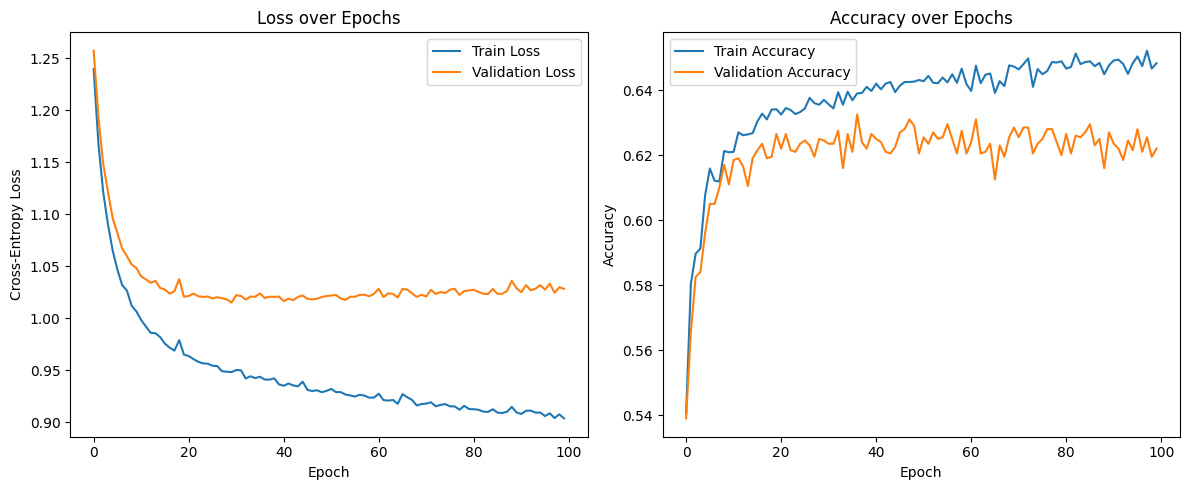

Submission file 'submission.csv' has been created.


In [ ]:
import pickle
import numpy as np
import csv
import matplotlib.pyplot as plt

# Load the training data
with open('./data/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

# Access images and labels
train_images = train_data['images']
train_labels = train_data['labels']

# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Use a subset of the data (e.g., 10,000 samples)
subset_size = 10000 # why do we need a subset size ?
indices = np.random.permutation(len(train_images))[:subset_size]
train_images = train_images[indices]
train_labels = train_labels[indices]

# Flatten the training images
X = np.array([img.flatten() for img in train_images])

# Normalize the data (zero mean and unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 1e-8  # Add a small value to avoid division by zero
X = (X - X_mean) / X_std

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, train_labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes):
    N = len(y)
    y_one_hot = np.zeros((N, num_classes))
    y_one_hot[np.arange(N), y] = 1
    return y_one_hot

num_classes = 4
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_val_one_hot = one_hot_encode(y_val, num_classes)

# Hyperparameters
learning_rate = 0.01
num_epochs = 100
batch_size = 128

# Initialize weights and bias
np.random.seed(42)  # For reproducibility
num_features = X_train.shape[1]
W = np.random.randn(num_features, num_classes) * 0.01
b = np.zeros(num_classes)

# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def compute_loss(probs, y_true):
    N = y_true.shape[0]
    # Clip probabilities to prevent log(0)
    probs_clipped = np.clip(probs, 1e-8, 1 - 1e-8)
    loss = -np.sum(y_true * np.log(probs_clipped)) / N
    return loss

# Training loop
N = X_train.shape[0]
num_batches = int(np.ceil(N / batch_size))
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Shuffle the data at the beginning of each epoch
    indices = np.arange(N)
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_one_hot_shuffled = y_train_one_hot[indices]
    
    for i in range(0, N, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_one_hot_shuffled[i:i+batch_size]
        
        # Forward pass
        logits = np.dot(X_batch, W) + b  # Shape: (batch_size, num_classes)
        probs = softmax(logits)  # Shape: (batch_size, num_classes)
        
        # Compute loss (optional, can be commented out for speed)
        # loss = compute_loss(probs, y_batch)
        
        # Backward pass (compute gradients)
        grad_logits = (probs - y_batch) / batch_size  # Shape: (batch_size, num_classes)
        grad_W = np.dot(X_batch.T, grad_logits)  # Shape: (num_features, num_classes)
        grad_b = np.sum(grad_logits, axis=0)  # Shape: (num_classes,)
        
        # Update weights
        W -= learning_rate * grad_W
        b -= learning_rate * grad_b
    
    # Compute loss and accuracy on training set
    logits_train = np.dot(X_train, W) + b
    probs_train = softmax(logits_train)
    loss_train = compute_loss(probs_train, y_train_one_hot)
    y_pred_train = np.argmax(probs_train, axis=1)
    train_accuracy = np.mean(y_pred_train == y_train)
    
    # Compute loss and accuracy on validation set
    logits_val = np.dot(X_val, W) + b
    probs_val = softmax(logits_val)
    loss_val = compute_loss(probs_val, y_val_one_hot)
    y_pred_val = np.argmax(probs_val, axis=1)
    val_accuracy = np.mean(y_pred_val == y_val)
    
    # Record losses and accuracies
    train_losses.append(loss_train)
    val_losses.append(loss_val)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Print progress
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {loss_train:.4f}, Train Acc: {train_accuracy:.4f}, "
              f"Val Loss: {loss_val:.4f}, Val Acc: {val_accuracy:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Load the test data
with open('./data/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

# Access test images
test_images = test_data['images']
test_images = np.array(test_images)

# Flatten the test images
X_test = np.array([img.flatten() for img in test_images])

# Normalize the test data using training data statistics
X_test = (X_test - X_mean) / X_std

# Make predictions on the test data
logits_test = np.dot(X_test, W) + b  # Shape: (num_test_samples, num_classes)
probs_test = softmax(logits_test)  # Shape: (num_test_samples, num_classes)

# Predicted classes
y_pred_test = np.argmax(probs_test, axis=1)

# Write the predictions to a CSV file
with open('submission.csv', 'w', newline='') as csvfile:
    fieldnames = ['ID', 'Class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for idx, pred in enumerate(y_pred_test):
        writer.writerow({'ID': idx + 1, 'Class': int(pred)})

print("Submission file 'submission.csv' has been created.")


Epoch 1/50, Train Loss: 1.0535, Train Acc: 0.5706, Val Loss: 1.0520, Val Acc: 0.5767
Epoch 5/50, Train Loss: 0.9292, Train Acc: 0.6478, Val Loss: 0.9386, Val Acc: 0.6462
Epoch 10/50, Train Loss: 0.8639, Train Acc: 0.6762, Val Loss: 0.8839, Val Acc: 0.6697
Epoch 15/50, Train Loss: 0.8125, Train Acc: 0.7004, Val Loss: 0.8408, Val Acc: 0.6921
Epoch 20/50, Train Loss: 0.7679, Train Acc: 0.7215, Val Loss: 0.8077, Val Acc: 0.7079
Epoch 25/50, Train Loss: 0.7270, Train Acc: 0.7394, Val Loss: 0.7774, Val Acc: 0.7230
Epoch 30/50, Train Loss: 0.6915, Train Acc: 0.7540, Val Loss: 0.7501, Val Acc: 0.7319
Epoch 35/50, Train Loss: 0.6610, Train Acc: 0.7652, Val Loss: 0.7283, Val Acc: 0.7398
Epoch 40/50, Train Loss: 0.6357, Train Acc: 0.7736, Val Loss: 0.7121, Val Acc: 0.7454
Epoch 45/50, Train Loss: 0.6142, Train Acc: 0.7825, Val Loss: 0.7003, Val Acc: 0.7505
Epoch 50/50, Train Loss: 0.5932, Train Acc: 0.7909, Val Loss: 0.6885, Val Acc: 0.7566


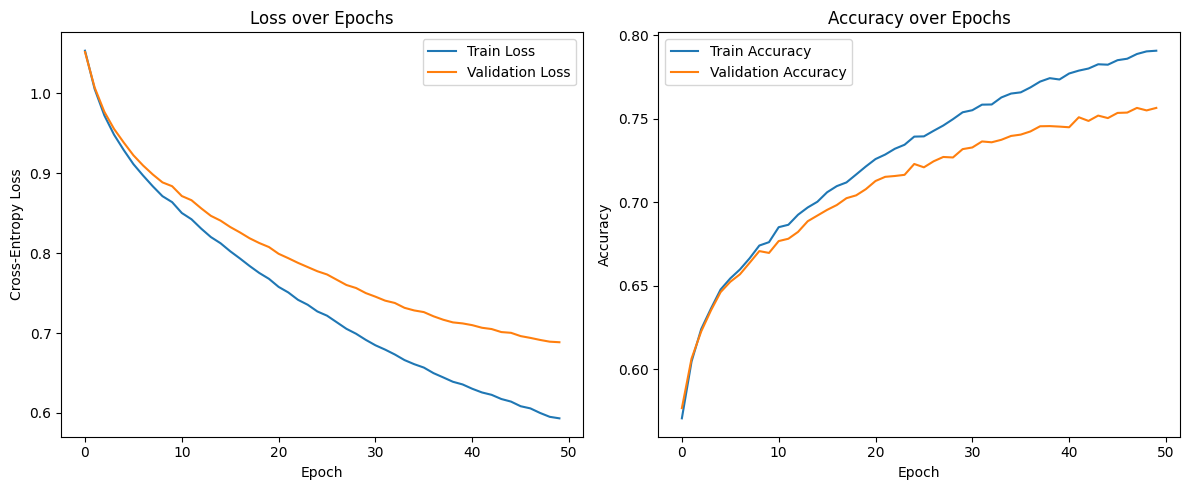

Submission file 'submission.csv' has been created.


In [4]:
import pickle
import numpy as np
import csv
import matplotlib.pyplot as plt

# Load the training data
with open('./data/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

# Access images and labels
train_images = np.array(train_data['images'])
train_labels = np.array(train_data['labels'])

# Flatten the training images
X = train_images.reshape(len(train_images), -1)  # Shape: (num_samples, 784)
y = train_labels  # Shape: (num_samples,)

# Normalize the data (zero mean and unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 1e-8  # Avoid division by zero
X = (X - X_mean) / X_std

# Use more data (e.g., 50,000 samples)
subset_size = 50000
indices = np.random.permutation(len(X))[:subset_size]
X = X[indices]
y = y[indices]

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes):
    N = len(y)
    y_one_hot = np.zeros((N, num_classes))
    y_one_hot[np.arange(N), y] = 1
    return y_one_hot

num_classes = 4
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_val_one_hot = one_hot_encode(y_val, num_classes)

# Hyperparameters
learning_rate = 0.01
num_epochs = 50
batch_size = 256
hidden_units = 128  # Number of neurons in the hidden layer

# Initialize weights and biases
np.random.seed(42)
num_features = X_train.shape[1]  # 784

# Xavier Initialization for weights
W1 = np.random.randn(num_features, hidden_units) * np.sqrt(1. / num_features)
b1 = np.zeros(hidden_units)

W2 = np.random.randn(hidden_units, num_classes) * np.sqrt(1. / hidden_units)
b2 = np.zeros(num_classes)

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Loss function
def compute_loss(probs, y_true):
    N = y_true.shape[0]
    probs_clipped = np.clip(probs, 1e-8, 1 - 1e-8)
    loss = -np.sum(y_true * np.log(probs_clipped)) / N
    return loss

# Training loop
N = X_train.shape[0]
num_batches = int(np.ceil(N / batch_size))
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Shuffle the data at the beginning of each epoch
    indices = np.arange(N)
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_one_hot_shuffled = y_train_one_hot[indices]
    
    for i in range(0, N, batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_one_hot_shuffled[i:i+batch_size]
        
        # Forward pass
        Z1 = np.dot(X_batch, W1) + b1  # Shape: (batch_size, hidden_units)
        A1 = relu(Z1)  # Activation from hidden layer
        Z2 = np.dot(A1, W2) + b2  # Shape: (batch_size, num_classes)
        probs = softmax(Z2)  # Output probabilities
        
        # Compute loss (optional)
        # loss = compute_loss(probs, y_batch)
        
        # Backward pass
        # Output layer gradients
        dZ2 = (probs - y_batch) / batch_size  # Shape: (batch_size, num_classes)
        dW2 = np.dot(A1.T, dZ2)  # Shape: (hidden_units, num_classes)
        db2 = np.sum(dZ2, axis=0)  # Shape: (num_classes,)
        
        # Hidden layer gradients
        dA1 = np.dot(dZ2, W2.T)  # Shape: (batch_size, hidden_units)
        dZ1 = dA1 * relu_derivative(Z1)  # Shape: (batch_size, hidden_units)
        dW1 = np.dot(X_batch.T, dZ1)  # Shape: (num_features, hidden_units)
        db1 = np.sum(dZ1, axis=0)  # Shape: (hidden_units,)
        
        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    
    # Compute loss and accuracy on training set
    Z1_train = np.dot(X_train, W1) + b1
    A1_train = relu(Z1_train)
    Z2_train = np.dot(A1_train, W2) + b2
    probs_train = softmax(Z2_train)
    loss_train = compute_loss(probs_train, y_train_one_hot)
    y_pred_train = np.argmax(probs_train, axis=1)
    train_accuracy = np.mean(y_pred_train == y_train)
    
    # Compute loss and accuracy on validation set
    Z1_val = np.dot(X_val, W1) + b1
    A1_val = relu(Z1_val)
    Z2_val = np.dot(A1_val, W2) + b2
    probs_val = softmax(Z2_val)
    loss_val = compute_loss(probs_val, y_val_one_hot)
    y_pred_val = np.argmax(probs_val, axis=1)
    val_accuracy = np.mean(y_pred_val == y_val)
    
    # Record losses and accuracies
    train_losses.append(loss_train)
    val_losses.append(loss_val)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Print progress
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {loss_train:.4f}, Train Acc: {train_accuracy:.4f}, "
              f"Val Loss: {loss_val:.4f}, Val Acc: {val_accuracy:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Load the test data
with open('./data/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

# Access test images
test_images = np.array(test_data['images'])

# Flatten the test images
X_test = test_images.reshape(len(test_images), -1)

# Normalize the test data using training data statistics
X_test = (X_test - X_mean) / X_std

# Make predictions on the test data
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
probs_test = softmax(Z2_test)

# Predicted classes
y_pred_test = np.argmax(probs_test, axis=1)

# Write the predictions to a CSV file
with open('submission.csv', 'w', newline='') as csvfile:
    fieldnames = ['ID', 'Class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for idx, pred in enumerate(y_pred_test):
        writer.writerow({'ID': idx + 1, 'Class': int(pred)})

print("Submission file 'submission.csv' has been created.")


----

In [ ]:
class simpleNN:
    """
    A simple fully connected neural network with one hidden layer using ReLU activation
    and softmax output for multi-class classification.
    """

    def __init__(self, X_shape, h_shape, y_shape, lr=0.01, seed=42):
        """
        args:
            X_shape : int
                The dimensionality of the input features.
            h_shape : int
                The number of hidden units.
            y_shape : int
                The number of output classes.
            lr : float
                Learning rate for gradient descent.
            seed : int
                Random seed for reproducibility.
        """

        np.random.seed(seed)
        self.W1 = np.random.randn(X_shape, h_shape) / np.sqrt(X_shape)
        self.b1 = np.zeros((1, h_shape))
        self.W2 = np.random.randn(h_shape, y_shape) / np.sqrt(h_shape)
        self.b2 = np.zeros((1, y_shape))
        self.lr = lr

    def relu(self, x):
        """
        Applies the ReLU activation function element-wise.

        args :
            x : np.ndarray
                Input array.

        output : np.ndarray
                Result after applying ReLU.
        """
        return np.maximum(0, x)

    def d_relu(self, x):
        """
        Computes the derivative of the ReLU function.

        args
        x : np.ndarray
            Input array (pre-activation).

        output : np.ndarray
            Derivative of ReLU.
        """
        return (x > 0).astype(float)

    def softmax(self, x):
        """
        Applies the softmax function row-wise for classification outputs.

        args
            x : np.ndarray
                Logits before softmax.

        output :
            n.ndarray
                Probabilities after softmax.
        """
        shifted = x - np.max(x, axis=1, keepdims=True)
        exp_shifted = np.exp(shifted)
        return exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)

    def cross_entropy(self, p, y_c):
        """
        Computes the cross-entropy loss.

        args :
            p : np.ndarray
                Predicted probabilities.
            y_c : np.ndarray
                One-hot encoded true labels.

        output :
            float
                The cross-entropy loss.
        """
        p_capped = np.clip(p, 1e-8, 1 - 1e-8)
        N = y_c.shape[0]
        loss = -np.sum(y_c * np.log(p_capped)) / N
        return loss

    def fprop(self, X):
        """
        Performs the forward pass.

        args :
            X : np.ndarray
                Input data.

        output :
            tuple
                p: predicted probabilities
                cache: intermediate values needed for backward pass
        """

        h1 = X.dot(self.W1) + self.b1
        a1 = self.relu(h1)
        h2 = a1.dot(self.W2) + self.b2
        p = self._softmax(h2)
        cache = (X, a1, A1, h2, p)
        return p, cache

    def bprop(self, cache, y_c):
        """
        Performs the backward pass and updates the parameters.

        args :
            cache : tuple
                Values stored during the forward pass.
            y_c : np.ndarray
                One-hot encoded true labels.
        """
        X, h1, a1, h2, p = cache
        N = X.shape[0]

        d_h2 = (p - y_c) / N
        d_W2 = a1.T.dot(d_h2)
        d_b2 = np.sum(d_h2, axis=0, keepdims=True)

        d_a1 = d_h2.dot(self.W2.T)
        d_h1 = d_a1 * self.d_relu(h1)
        d_W1 = X.T.dot(d_h1)
        d_b1 = np.sum(d_h1, axis=0, keepdims=True)

        # Parameter update
        self.W2 -= self.lr * d_W2
        self.b2 -= self.lr * d_b2
        self.W1 -= self.lr * d_W1
        self.b1 -= self.lr * d_b1

    def predict(self, X):
        """
        Predicts class labels for input data.

        args :
            X : np.ndarray
                Input data.

        output :
            np.ndarray
                Predicted class labels.
        """
        p, _ = self.fprop(X)
        return np.argmax(p, axis=1)

    def fit(
        self, X_train, Y_train_onehot, X_val, Y_val_onehot, epochs=50, batch_size=256
    ):
        """
        Trains the neural network using mini-batch gradient descent.

        args :
            X_train : np.ndarray
                Training input data.
            Y_train_onehot : np.ndarray
                One-hot encoded training labels.
            X_val : np.ndarray
                Validation input data.
            Y_val_onehot : np.ndarray
                One-hot encoded validation labels.
            epochs : int
                Number of training epochs.
            batch_size : int
                Size of each mini-batch.
        """

        # Training with mini-batch gradient descent
        num_samples = X_train.shape[0]
        for epoch in range(epochs):
            idx = np.random.permutation(num_samples)
            X_train_shuffled = X_train[idx]
            Y_train_onehot_shuffled = Y_train_onehot[idx]

            for i in range(0, num_samples, batch_size):
                X_batch = X_train_shuffled[i : i + batch_size]
                Y_batch = Y_train_onehot_shuffled[i : i + batch_size]

                p, cache = self._forward(X_batch)
                self._backward(cache, Y_batch)

            train_loss, train_acc = self.evaluate(X_train, Y_train_onehot)
            val_loss, val_acc = self.evaluate(X_val, Y_val_onehot)
            if (epoch + 1) % 5 == 0 or epoch == 0:
                print(
                    f"Epoch {epoch+1}/{epochs} "
                    f"- Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
                    f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
                )


def evaluate(self, X, Y_onehot):
    """
        Evaluates the model on given data.
        
        args :
        X : np.ndarray
            Input data.
        Y_onehot : np.ndarray
            One-hot encoded true labels.
        
        ouput :
            tuple
                (loss, accuracy)
        """
    p, _ = self._forward(X)
    loss = self._compute_loss(p, Y_onehot)
    preds = np.argmax(p, axis=1)
    y_test = np.argmax(Y_onehot, axis=1)
    accuracy = np.mean(preds == y_test)
    return loss, accuracy


def one_hot_encode(y, n_class):
    """
    One-hot encodes integer labels.
    
    args :
        y : np.ndarray
            Array of integer labels.
        num_classes : int
            Number of classes.
    
    output :
        np.ndarray
            One-hot encoded labels.
    """
    encoded = np.zeros((len(y), n_class))
    encoded[np.arange(len(y)), y] = 1
    return encoded

In [ ]:
import pickle
import numpy as np
import csv
from sklearn.model_selection import train_test_split

# modify the following
path_train_data = './data/train_data.pkl'
path_test_data =  './data/test_data.pkl'
subset = 50000
h_shape = 128
lr = 0.01
epochs = 20
batch_size = 256

In [ ]:
# Train 
with open(path_train_data, 'rb') as f:
    train_data = pickle.load(f)

X = np.array(train_data['images'])
Y = np.array(train_data['labels'])

X = X.reshape(X.shape[0], -1).astype(float)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 1e-8
X_normalized = (X - X_mean) / X_std


indices = np.random.permutation(len(X_normalized))[:subset]
X_subset = X_normalized[indices]
Y_subset = Y[indices]

X_train, X_val, Y_train, Y_val = train_test_split(X_subset, Y_subset, test_size=0.2, random_state=42)

num_classes = 4
Y_train_onehot = one_hot_encode(Y_train, num_classes)
Y_val_onehot = one_hot_encode(Y_val, num_classes)

X_shape = X_train.shape[1]
y_shape = num_classes

model = simpleNN(X_shape, h_shape, y_shape, lr, seed=42)
model.fit(X_train, Y_train_onehot, X_val, Y_val_onehot, epochs, batch_size)

In [ ]:
# Predict
with open('./data/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

X_test_raw = np.array(test_data['images'])
X_test_flat = X_test_raw.reshape(X_test_raw.shape[0], -1).astype(float)
X_test_normalized = (X_test_flat - X_mean) / X_std

test_preds = model.predict(X_test_normalized)

with open('submission.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["ID", "Class"])
    for i, pred in enumerate(test_preds, start=1):
        writer.writerow([i, pred])

print("Submission saved to 'submission.csv'.")